In [4]:
pip install mne

  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Users\josef\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [7]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\josef\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [1]:
import mne
import pandas as pd
import matplotlib.pyplot as plt

# Ruta al archivo .edf
archivo_edf = r'data/prueba.edf'

# Cargar el archivo .edf
raw_data = mne.io.read_raw_edf(archivo_edf, preload=True, stim_channel='auto', verbose='error')

# Aplicar un filtro después de cargar los datos
raw_data.filter(l_freq=0.1, h_freq=100.0)

# Obtener los datos en formato de matriz numpy
datos = raw_data.get_data()

# Obtener los nombres de los canales
nombres_canales = raw_data.ch_names

# Crear un DataFrame de pandas
df = pd.DataFrame(datos.T, columns=nombres_canales)

# Visualizar el DataFrame
print(df.head(60))


C:\Users\adria\AppData\Local\Temp\ipykernel_28196\3621551833.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 8251 samples (33.004 s)

          EEG O1        EEG O2        EEG T3        EEG T4
0  -5.421011e-20  8.368686e-19 -5.421011e-20 -1.084202e-19
1  -2.834964e-08  1.986247e-08 -2.105178e-08  2.711226e-08
2  -5.670897e-08  3.972498e-08 -4.209376e-08  5.422455e-08
3  -8.507792e-08  5.958756e-08 -6.312592e-08  8.133687e-08
4  -1.134564e-07  7.945023e-08 -8.414819e-08  1.084492e-07
5  -1.418445e-07  9.931304e-08 -1.051605e-07  1.355617e-07
6  -1.702419e-07 

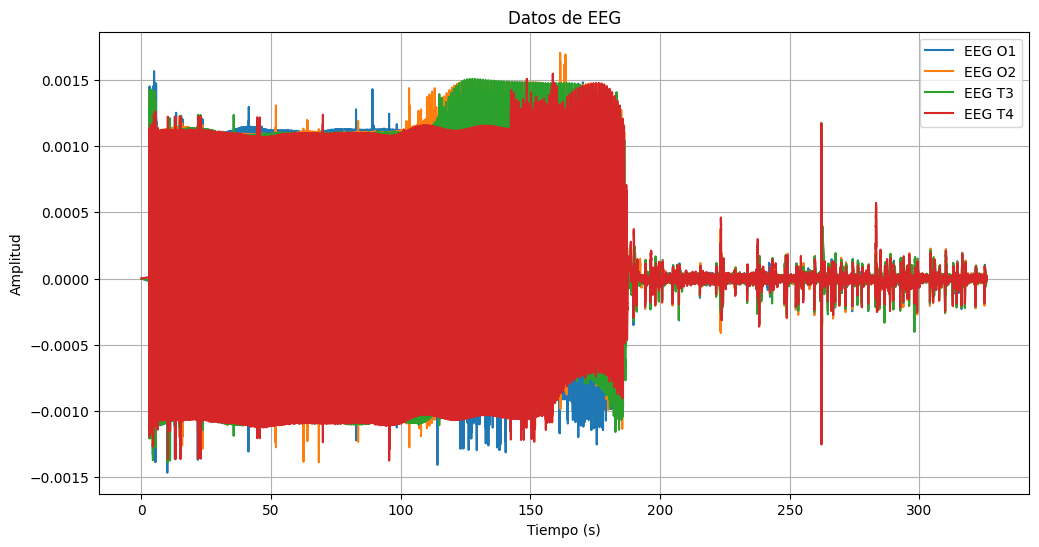

In [9]:
import mne
import pandas as pd
import matplotlib.pyplot as plt

# Graficar los datos
tiempo = raw_data.times[:datos.shape[1]]  # Tiempo en segundos
plt.figure(figsize=(12, 6))
for canal in nombres_canales:
    plt.plot(tiempo, df[canal], label=canal)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Datos de EEG')
plt.legend()
plt.grid(True)
plt.show()


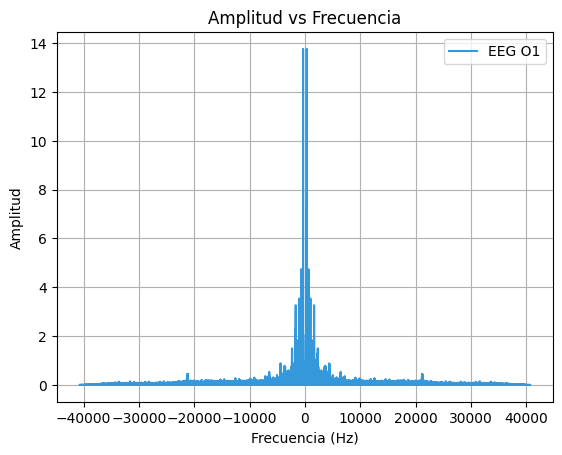

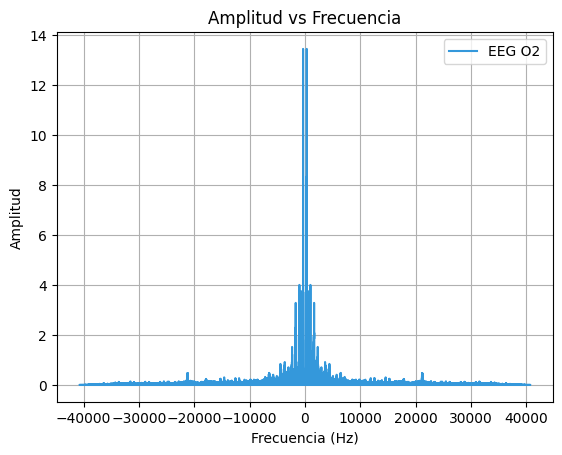

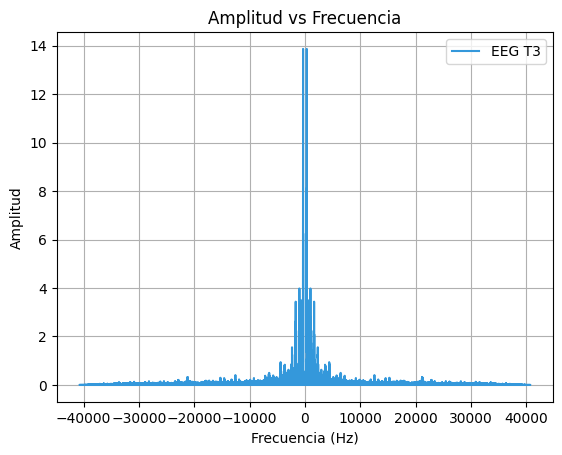

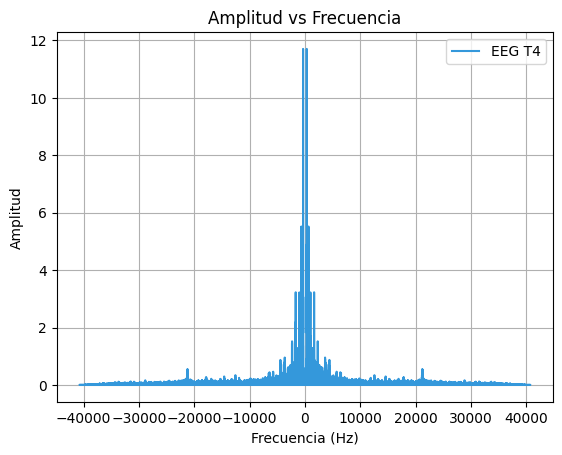

In [5]:
import numpy as np

tiempo = raw_data.times[:datos.shape[1]]  # Tiempo en segundos

for canal in nombres_canales:
    eeg_data = pd.to_numeric(df[canal])
    eeg_fft = np.fft.fft(eeg_data)
    frecuencia = np.fft.fftfreq(len(eeg_data), d=1/len(tiempo))
    plt.plot(frecuencia, np.abs(eeg_fft), label=canal, color='#3498db')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Amplitud')
    plt.title('Amplitud vs Frecuencia')
    plt.legend()
    plt.grid(True)
    plt.show()
    

               EEG O1              EEG O2              EEG T3  \
0  0.015403+0.000000j -0.000018+0.000000j  0.012333+0.000000j   
1  0.018148+0.001652j  0.009377+0.003233j  0.021277+0.002892j   
2  0.008682-0.003405j -0.026350-0.017186j -0.013544-0.017364j   
3  0.027587+0.009661j  0.024473+0.034755j  0.041565+0.039891j   
4  0.010946-0.002952j -0.011822-0.017397j -0.001187-0.036381j   

               EEG T4  
0 -0.002383+0.000000j  
1  0.001784-0.000140j  
2 -0.017520+0.002238j  
3  0.019613-0.009859j  
4 -0.037708+0.037339j  


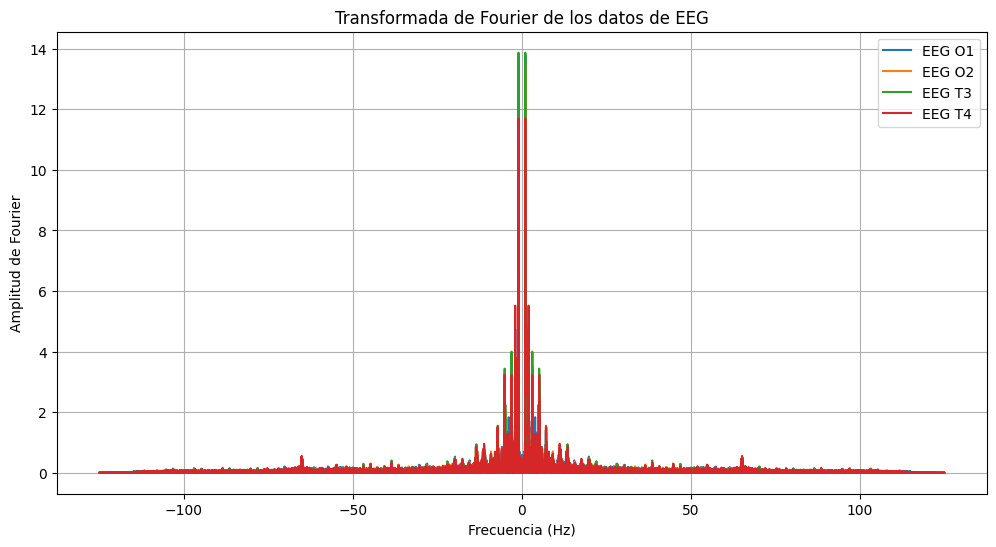

In [10]:
import numpy as np

# Calcular la transformada de Fourier de los datos
fft_values = np.fft.fft(datos)

# Obtener las frecuencias correspondientes
frecuencias = np.fft.fftfreq(datos.shape[1], d=1/raw_data.info['sfreq'])

# Crear un DataFrame de pandas para almacenar las amplitudes de Fourier por frecuencia
df_fft = pd.DataFrame(fft_values.T, columns=nombres_canales)

# Mostrar las primeras filas del DataFrame
print(df_fft.head())

# Graficar las amplitudes de Fourier por frecuencia
plt.figure(figsize=(12, 6))
for canal in nombres_canales:
    plt.plot(frecuencias, np.abs(df_fft[canal]), label=canal)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud de Fourier')
plt.title('Transformada de Fourier de los datos de EEG')
plt.legend()
plt.grid(True)
plt.show()


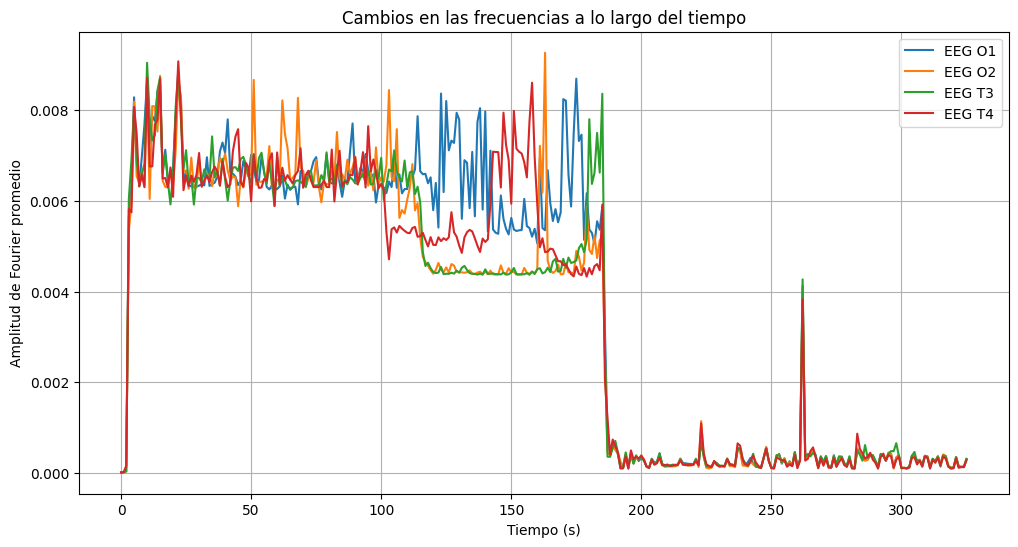

In [11]:
# Definir la duración de los segmentos temporales en segundos
duracion_segmento = 1.0

# Calcular el número de puntos de datos por segmento temporal
puntos_por_segmento = int(raw_data.info['sfreq'] * duracion_segmento)

# Calcular el número total de segmentos temporales
num_segmentos = datos.shape[1] // puntos_por_segmento

# Calcular la transformada de Fourier de cada segmento temporal
frecuencias_temporales = []
for i in range(num_segmentos):
    inicio = i * puntos_por_segmento
    fin = inicio + puntos_por_segmento
    datos_segmento = datos[:, inicio:fin]
    fft_segmento = np.fft.fft(datos_segmento)
    frecuencias_temporales.append(np.abs(fft_segmento))

# Convertir la lista de frecuencias temporales a un arreglo numpy
frecuencias_temporales = np.array(frecuencias_temporales)

# Calcular el tiempo correspondiente a cada segmento temporal
tiempo_segmentos = np.arange(0, num_segmentos) * duracion_segmento

# Graficar las frecuencias a lo largo del tiempo para cada canal
plt.figure(figsize=(12, 6))
for i, canal in enumerate(nombres_canales):
    plt.plot(tiempo_segmentos, frecuencias_temporales[:, i, :].mean(axis=1), label=canal)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud de Fourier promedio')
plt.title('Cambios en las frecuencias a lo largo del tiempo')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
# Promediar los datos a lo largo del tiempo
datos_promediados = np.mean(datos, axis=1)

# Calcular la transformada de Fourier de los datos promediados
fft_values = np.fft.fft(datos_promediados)

# Obtener las frecuencias correspondientes
frecuencias = np.fft.fftfreq(datos.shape[1], d=1/raw_data.info['sfreq'])

# Crear una cuadrícula de tiempo y frecuencia
tiempo, frecuencia = np.meshgrid(tiempo, frecuencias)

# Graficar
plt.figure(figsize=(12, 6))
plt.pcolormesh(tiempo, frecuencia, np.abs(fft_values), shading='gouraud', cmap='jet')
plt.colorbar(label='Amplitud de Fourier')
plt.xlabel('Tiempo (s)')
plt.ylabel('Frecuencia (Hz)')
plt.title('Espectrograma de los datos de EEG (promediados)')
plt.show()


MemoryError: Unable to allocate 49.5 GiB for an array with shape (81500, 81500) and data type float64

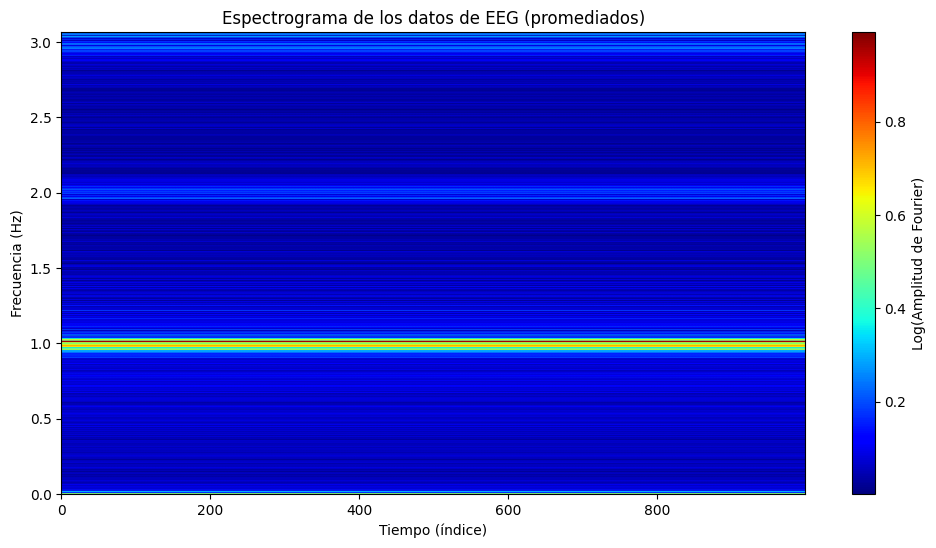

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mne

# Ruta al archivo .edf
archivo_edf = "prueba.edf"

# Cargar el archivo .edf
raw_data = mne.io.read_raw_edf(archivo_edf, preload=True, stim_channel='auto', verbose='error')

# Promediar los datos a lo largo del tiempo
datos_promediados = np.mean(raw_data.get_data(), axis=0)

# Calcular la transformada de Fourier de los datos promediados
fft_values = np.fft.fft(datos_promediados)

# Obtener las frecuencias correspondientes
frecuencias = np.fft.fftfreq(datos_promediados.shape[0], d=1/raw_data.info['sfreq'])

# Limitar el rango de frecuencias y el número de puntos en el tiempo
num_puntos_tiempo = min(1000, len(raw_data.times))  # Limitar a 1000 puntos en el tiempo
frecuencias_limitadas = frecuencias[:num_puntos_tiempo]
tiempo_limitado = raw_data.times[:num_puntos_tiempo]

# Expandir fft_values a una matriz bidimensional y repetir para cada frecuencia
fft_values_expandido = np.abs(fft_values[:num_puntos_tiempo])
fft_values_expandido = np.repeat(fft_values_expandido[:, np.newaxis], len(frecuencias_limitadas), axis=1)

# Escalar los valores logarítmicamente para mejorar la percepción
fft_values_log = np.log10(fft_values_expandido + 1)  # Se agrega 1 para evitar log(0)

# Graficar
plt.figure(figsize=(12, 6))
plt.pcolormesh(np.arange(num_puntos_tiempo), frecuencias_limitadas, fft_values_log, shading='gouraud', cmap='jet')
plt.colorbar(label='Log(Amplitud de Fourier)')
plt.xlabel('Tiempo (índice)')
plt.ylabel('Frecuencia (Hz)')
plt.title('Espectrograma de los datos de EEG (promediados)')
plt.show()


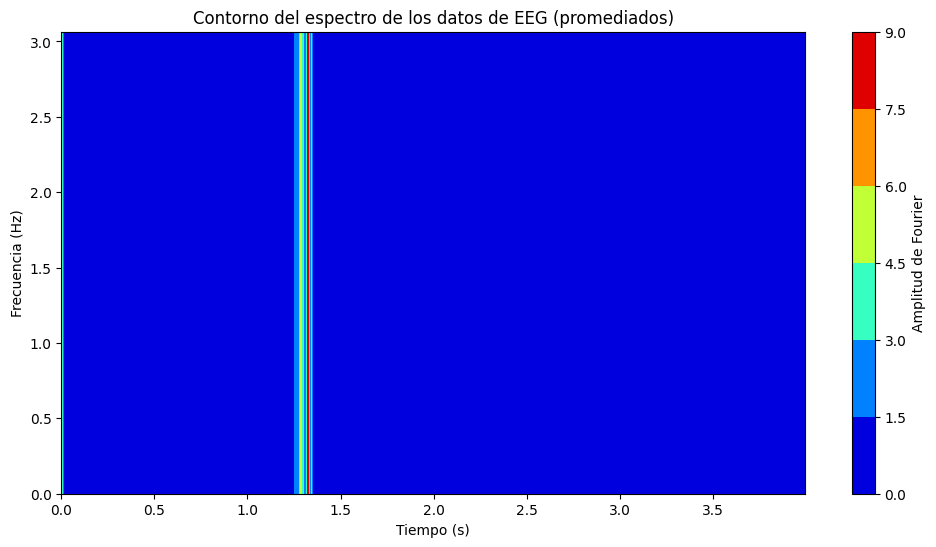

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import mne

# Ruta al archivo .edf
archivo_edf = "prueba.edf"

# Cargar el archivo .edf
raw_data = mne.io.read_raw_edf(archivo_edf, preload=True, stim_channel='auto', verbose='error')

# Promediar los datos a lo largo del tiempo
datos_promediados = np.mean(raw_data.get_data(), axis=0)

# Calcular la transformada de Fourier de los datos promediados
fft_values = np.fft.fft(datos_promediados)

# Obtener las frecuencias correspondientes
frecuencias = np.fft.fftfreq(datos_promediados.shape[0], d=1/raw_data.info['sfreq'])

# Limitar el rango de frecuencias y el número de puntos en el tiempo
num_puntos_tiempo = min(1000, len(raw_data.times))  # Limitar a 1000 puntos en el tiempo
frecuencias_limitadas = frecuencias[:num_puntos_tiempo]
tiempo_limitado = raw_data.times[:num_puntos_tiempo]

# Expandir fft_values a una matriz bidimensional y repetir para cada frecuencia
fft_values_expandido = np.abs(fft_values[:num_puntos_tiempo])
fft_values_expandido = np.repeat(fft_values_expandido[:, np.newaxis], len(frecuencias_limitadas), axis=1)

# Graficar el contorno
plt.figure(figsize=(12, 6))
plt.contourf(tiempo_limitado, frecuencias_limitadas, fft_values_expandido.T, cmap='jet')
plt.colorbar(label='Amplitud de Fourier')
plt.xlabel('Tiempo (s)')
plt.ylabel('Frecuencia (Hz)')
plt.title('Contorno del espectro de los datos de EEG (promediados)')
plt.show()


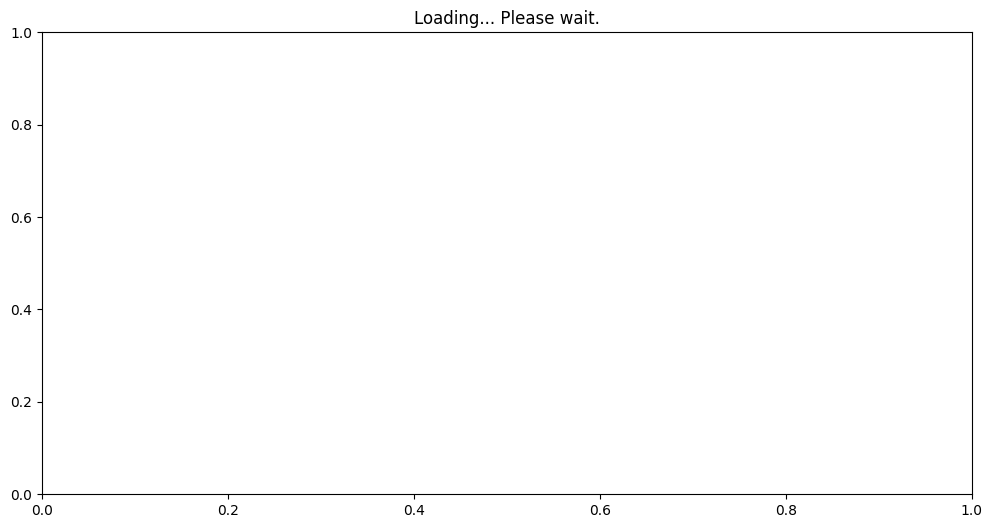

Length time = 81500
Max time = 325.996


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import mne
import pandas as pd

# Ruta al archivo .edf
archivo_edf = "data/prueba.edf"

# Cargar el archivo .edf
raw_data = mne.io.read_raw_edf(archivo_edf, preload=True, stim_channel='auto', verbose='error')

# Crear la figura 3D
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

ax.set_title('Loading... Please wait.')

# Display the figure to show the loading title
plt.show(block=False)

# Promediar los datos a lo largo del tiempo
datos_promediados = np.mean(raw_data.get_data(), axis=0)

# Calcular la transformada de Fourier de los datos promediados
fft_values = np.fft.fft(datos_promediados)

# Obtener las frecuencias correspondientes
frecuencias = np.fft.fftfreq(datos_promediados.shape[0], d=1/raw_data.info['sfreq'])

print(f"Length time = {len(raw_data.times)}")
print(f"Max time = {max(raw_data.times.T)}")

puntos_tiempo_min = int(80 * raw_data.info['sfreq'])
puntos_tiempo_max = int(100 * raw_data.info['sfreq'])

# Limitar el rango de frecuencias y el número de puntos en el tiempo
# num_puntos_tiempo = min(1000, len(raw_data.times))  # Limitar a 1000 puntos en el tiempo
frecuencias_limitadas = frecuencias[puntos_tiempo_min:puntos_tiempo_max]
tiempo_limitado = raw_data.times[puntos_tiempo_min:puntos_tiempo_max]

# Expandir fft_values a una matriz bidimensional y repetir para cada frecuencia
fft_values_expandido = np.abs(fft_values[puntos_tiempo_min:puntos_tiempo_max])
fft_values_expandido = np.repeat(fft_values_expandido[:, np.newaxis], len(frecuencias_limitadas), axis=1)

# Crear una malla para los datos
X, Y = np.meshgrid(tiempo_limitado, frecuencias_limitadas)

# ax = fig.add_subplot(111, projection='3d')
ax.clear()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, fft_values_expandido.T, cmap='jet')

# Etiquetas y título
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Frecuencia (Hz)')
ax.set_zlabel('Amplitud de Fourier')
ax.set_title('Amplitud de Fourier en función del tiempo y la frecuencia')

plt.show()
